In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [16]:
af=pd.read_csv(r'D:\桌面快捷\paper\fars数据\csv2017\trippub.csv')

In [27]:
af1=af.loc[:,['HOUSEID','HHVEHCNT','URBRUR','TRPTRANS','TRPMILAD','WTTRDFIN','PSGR_FLG','TRVLCMIN','TRPHHVEH','R_AGE_IMP','WHYTRP1S','TRACCTM']]

In [28]:
af2=af1[(af1['TRPMILAD']>=0) & (af1['TRPMILAD']<=75.)]
af3=af2[(af2['TRVLCMIN']>0)&(af2['TRVLCMIN']<=150)]
af4=af3[af3['TRPTRANS']>0]
af4.loc[(af4['TRPTRANS'] >= 3) & (af4['TRPTRANS'] <= 9), 'TRPTRANS'] = 3
af4.loc[(af4['TRPTRANS'] >= 11) & (af4['TRPTRANS'] <= 18), 'TRPTRANS'] = 4
af4.loc[af4['TRPTRANS'] == 10, 'TRPTRANS'] = 5
af4.loc[af4['TRPTRANS'] >= 19, 'TRPTRANS'] = 6
af4.loc[af4['WHYTRP1S']==1,'WHYTRP1S']=1
af4.loc[af4['WHYTRP1S']==10,'WHYTRP1S']=2
af4.loc[af4['WHYTRP1S']==20,'WHYTRP1S']=3
af4.loc[af4['WHYTRP1S']==30,'WHYTRP1S']=4
af4.loc[af4['WHYTRP1S']==40,'WHYTRP1S']=5
af4.loc[af4['WHYTRP1S']==50,'WHYTRP1S']=6
af4.loc[af4['WHYTRP1S']==70,'WHYTRP1S']=7
af4.loc[af4['WHYTRP1S']==80,'WHYTRP1S']=8
af4.loc[af4['WHYTRP1S']==97,'WHYTRP1S']=9
af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)




C:\Users\57273\AppData\Local\Temp\ipykernel_17156\2072012798.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)


In [29]:
df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)]
df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)]
df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)]
weight1=df1['WTTRDFIN']
weight2=df2['WTTRDFIN']
weight3=df3['WTTRDFIN']
weight=[weight1,weight2,weight3]

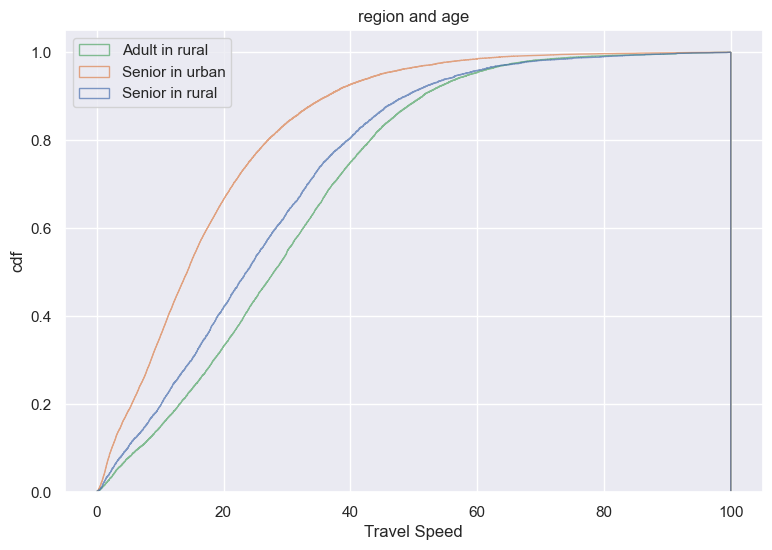

In [30]:
data11=df1['speed']
data12=df2['speed']
data13=df3['speed']
dataTT=[data11,data12,data13]
label1=['Senior in rural','Senior in urban','Adult in rural']
fig = plt.figure(figsize=(9, 6))
plt.hist(dataTT, bins=5000, density=True,range=(0,100), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weight)
plt.xlabel('Travel Speed')
plt.ylabel('cdf')
plt.title('region and age')
plt.legend()
plt.show()

In [32]:
af5=af4[af4['TRACCTM']>=0]


,HOUSEID,HHVEHCNT,URBRUR,TRPTRANS,TRPMILAD,WTTRDFIN,PSGR_FLG,TRVLCMIN,TRPHHVEH,R_AGE_IMP,WHYTRP1S,TRACCTM,speed
102,30000130,1,1,4,11.229,1.352505e+06,-1,75,1,45,2,5,8.983200
116,30000144,0,1,4,2.426,3.271820e+05,-1,29,2,29,7,1,5.019310
117,30000144,0,1,4,2.752,3.271820e+05,-1,48,2,29,1,5,3.440000
118,30000144,0,1,4,2.752,3.271820e+05,-1,57,2,29,7,35,2.896842
120,30000144,0,1,4,3.223,3.271820e+05,-1,67,2,29,1,12,2.886269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923160,40793555,6,1,4,47.506,2.389766e+05,-1,150,2,50,1,5,19.002400
923306,40793966,4,1,4,3.093,8.798585e+04,-1,30,2,13,3,5,6.186000
923307,40793966,4,1,4,1.737,8.798585e+04,-1,30,2,13,1,5,3.474000
923326,40793969,3,1,4,36.004,1.314464e+06,-1,90,2,23,2,1,24.002667


In [33]:
df11=af5[(af4['R_AGE_IMP']>=65)&(af5['URBRUR']==2)]
df21=af5[(af5['R_AGE_IMP']>=65)&(af5['URBRUR']==1)]
df31=af5[(af4['R_AGE_IMP']>=16)&(af5['R_AGE_IMP']<65)&(af5['URBRUR']==2)]
weight11=df11['WTTRDFIN']
weight21=df21['WTTRDFIN']
weight31=df31['WTTRDFIN']
weightT=[weight11,weight21,weight31]

C:\Users\57273\AppData\Local\Temp\ipykernel_17156\3866315421.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df11=af5[(af4['R_AGE_IMP']>=65)&(af5['URBRUR']==2)]
C:\Users\57273\AppData\Local\Temp\ipykernel_17156\3866315421.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df31=af5[(af4['R_AGE_IMP']>=16)&(af5['R_AGE_IMP']<65)&(af5['URBRUR']==2)]


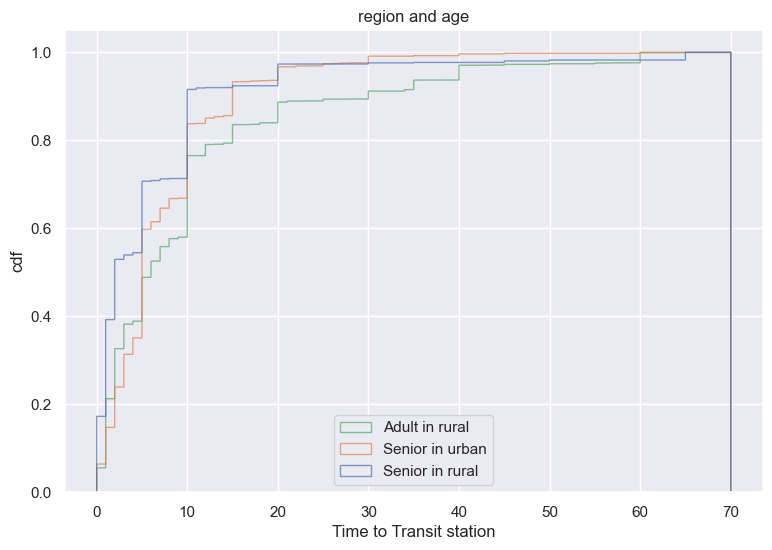

In [46]:
data1=df11['TRACCTM']
data2=df21['TRACCTM']
data3=df31['TRACCTM']
data=[data1,data2,data3]
fig = plt.figure(figsize=(9, 6))
plt.hist(data, bins=5000, density=True,range=(0,70), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weightT)
plt.xlabel('Time to Transit station')
plt.ylabel('cdf')
plt.title('region and age')
plt.legend()
plt.show()

In [36]:
bf=pd.read_csv(r'D:\桌面快捷\paper\fars数据\csv2017\perpub.csv')

In [40]:
bf4=bf.loc[:,['URBRUR','CNTTDTR','WTPERFIN','R_AGE_IMP']]
bf4

,URBRUR,CNTTDTR,WTPERFIN,R_AGE_IMP
0,1,2,206.690153,67
1,1,2,197.075742,66
2,1,2,219.514210,28
3,2,2,63.185911,55
4,2,0,58.665911,49
...,...,...,...,...
264229,2,0,213.514657,18
264230,2,0,133.448420,14
264231,2,2,133.448420,12
264232,2,0,133.448420,8


In [41]:
ef1=bf4[(bf4['R_AGE_IMP']>=65)&(bf4['URBRUR']==2)]
ef2=bf4[(bf4['R_AGE_IMP']>=65)&(bf4['URBRUR']==1)]
ef3=bf4[(bf4['R_AGE_IMP']>=16)&(bf4['R_AGE_IMP']<65)&(bf4['URBRUR']==2)]
weighte1=ef1['WTPERFIN']
weighte2=ef2['WTPERFIN']
weighte3=ef3['WTPERFIN']
weighttrip=[weighte1,weighte2,weighte3]

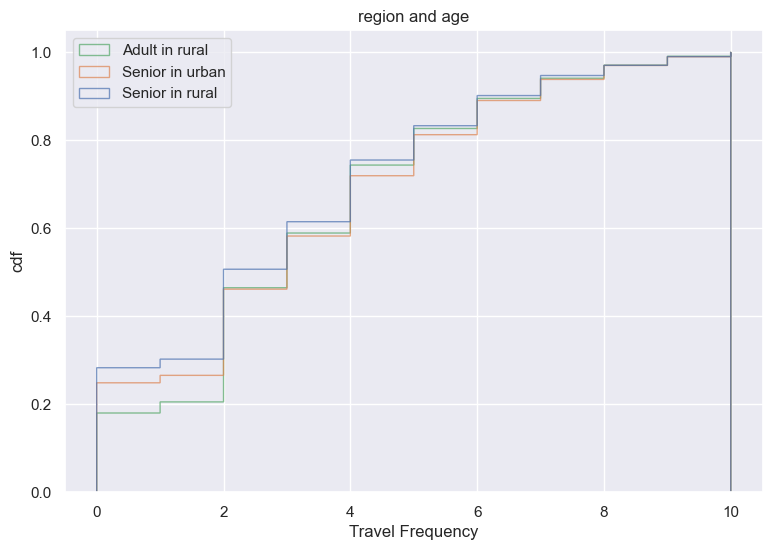

In [45]:
datae1=ef1['CNTTDTR']
datae2=ef2['CNTTDTR']
datae3=ef3['CNTTDTR']
datae=[datae1,datae2,datae3]
label1=['Senior in rural','Senior in urban','Adult in rural']
fig = plt.figure(figsize=(9, 6))
plt.hist(datae, bins=5000, density=True,range=(0,10), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weighttrip)
plt.xlabel('Travel Frequency')
plt.ylabel('cdf')
plt.title('region and age')
plt.legend()
plt.show()

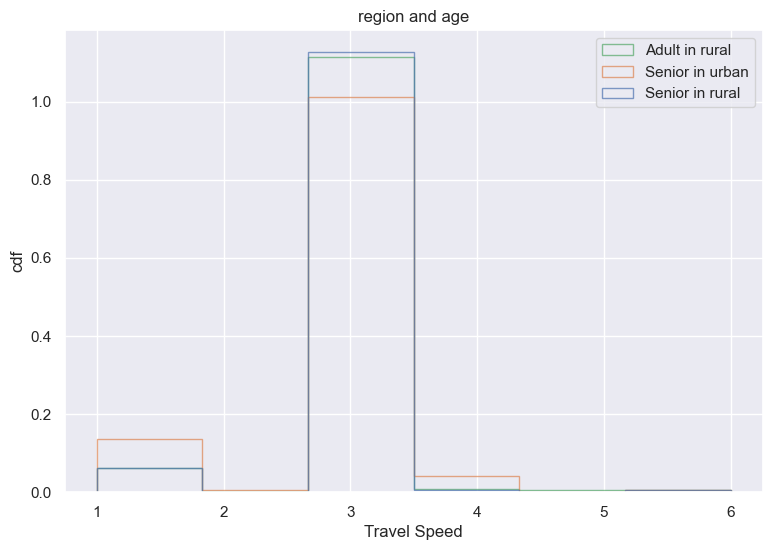

In [48]:
data1m=df1['TRPTRANS']
data2m=df2['TRPTRANS']
data3m=df3['TRPTRANS']
dataTT=[data1m,data2m,data3m]
label1=['Senior in rural','Senior in urban','Adult in rural']
fig = plt.figure(figsize=(9, 6))
plt.hist(dataTT, bins=6, density=True,range=(1,6), label=label1,alpha=0.7,histtype='step',weights=weight)
plt.xlabel('Travel Speed')
plt.ylabel('cdf')
plt.title('region and age')
plt.legend()
plt.show()